In [2]:
# Import all required modules
import pandas as pd
import numpy as np

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Import plotting modules
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [31]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (10, 4), 
        "axes.titlesize": 12 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 4

In [9]:
df = pd.read_csv('mlbootcamp5_train.csv')
df.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0


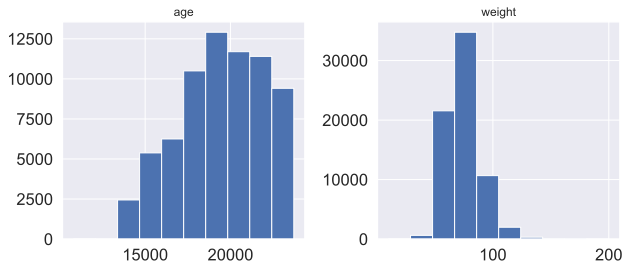

In [48]:
features = ['age', 'weight']
df[features].hist(figsize=(10, 4));

In [37]:
#How many men and women are present in this dataset? 
#Values of the gender feature were not given (whether "1" stands for women or for men) – figure 
#this out by looking analyzing height, making the assumption that men are taller on average.
sex = pd.DataFrame(df.groupby(['gender']).mean().height)
sex['cnt'] = df.gender.value_counts()
sex

,height,cnt
gender,,
1,161.355612,45530
2,169.947895,24470


In [92]:
#Who more often report consuming alcohol - men or women
df.groupby('gender')['alco'].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

In [100]:
#What's the rounded difference between the percentages of smokers among men and women?
pct_smoke = df.groupby('gender')['smoke'].mean()
round(pct_smoke.iloc[1]-pct_smoke.iloc[0], 2)*100

20.0

In [124]:
#What is the difference between median values of age for smokers and non-smokers (in months, rounded)? 
#You'll need to figure out the units of feature age in this dataset
df['age_years'] = df.age/365.25
(df.groupby('smoke')['age_years'].median()[0] - df.groupby('smoke')['age_years'].median()[1])*12

19.61396303901438

In [173]:
df['bmi'] = df.weight / (df.height/100)**2

In [176]:
#Median BMI in the sample is within boundaries of normal values.
df.bmi.mean()
# False

27.55651255127882

In [177]:
#Women's BMI is on average higher then men's.
df.groupby('gender')['bmi'].mean()
#True

gender
1    27.987583
2    26.754442
Name: bmi, dtype: float64

In [179]:
#Healthy people have, on average, higher BMI than ill people.
df.groupby('cardio')['bmi'].mean()
#False

cardio
0    26.548175
1    28.566061
Name: bmi, dtype: float64

In [204]:
#In the segment of healthy and non-drinking men BMI is closer 
#to the norm than in the segment of healthy and non-drinking women
df[(df.cardio==0) & (df.alco==0)].groupby(['gender'])['bmi'].mean()
#True

gender
1    26.845407
2    25.872638
Name: bmi, dtype: float64

Filter out the following patient segments (we consider these as erroneous data)

diastolic(ap_lo) pressure is higher than systolic (ap_hi)
height is strictly less than 2.5 percentile 
(Use pd.Series.quantile to compute this value. If you are not familiar with the function, please read the docs.)
height is strictly more than 97.5 percentile
weight is strictly less than 2.5 percentile
weight is strictly more than 97.5 percentile

In [237]:
cnt_dropped = df[((df.ap_lo > df.ap_hi) 
               | (df.height < df.height.quantile(q=0.025)) 
               | (df.height > df.height.quantile(q=0.975))
               | (df.weight < df.weight.quantile(q=0.025))
               | (df.weight > df.weight.quantile(q=0.975)))].count().iloc[1]
cnt_all = df.age.count()
cnt_dropped / cnt_all

0.0963

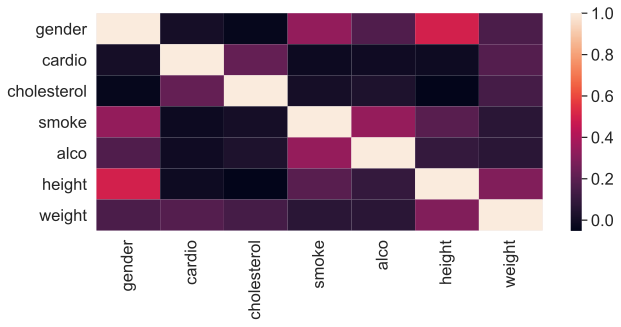

In [270]:
#Which pair of features has the strongest Pearson's correlation with gender feature? 
corr_matrix = df[['gender', 'cardio', 'cholesterol', 'smoke', 'alco', 'height', 'weight']].corr()
sns.heatmap(corr_matrix)

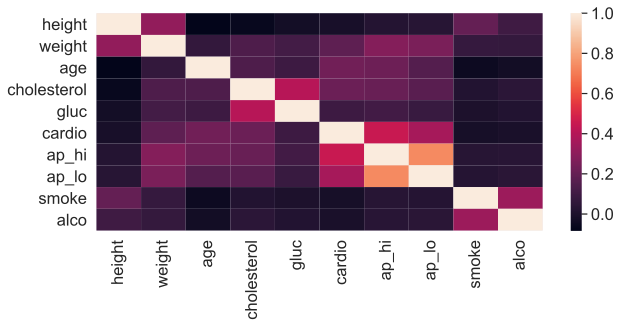

In [272]:
#Which pair of features has the strongest Spearman's correlation between each other?
corr_matrix = df[['height', 'weight', 'age', 'cholesterol', 'gluc', 'cardio', 'ap_hi', 'ap_lo', 'smoke', 'alco']] \
                .corr(method ='spearman')
sns.heatmap(corr_matrix)

In [257]:
df['age_round'] = round(df.age_years)

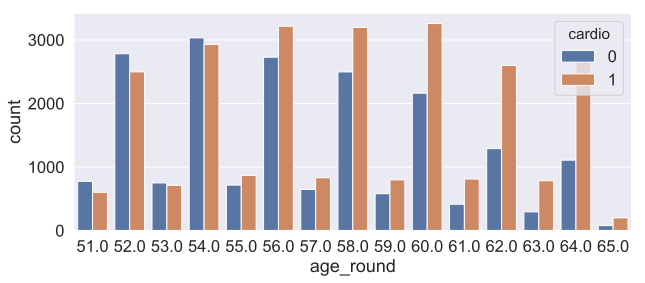

In [269]:
#At what age does the number of people with CVD outnumber the number of people without CVD for the first time?
sns.countplot(x='age_round', hue='cardio', data=df[df.age_round>50])